# Reaching_Task_2026_Ex1_Zhidong_Yuzhe

## Task 1

Target angle is `-45` degrees for baseline task, `135` degrees for the 1st interference task, `220` degrees for the 2nd interference task (non-interference segments) and with `270` degrees for interference segments of the 2nd task.

The perturbation angle used in this experiment is always `30` degrees.

```python
    ...
    TARGET_ANGLE = 45  # degrees for baseline and 1st inference task 
    is2ndInfer = False  # True for 2nd interference task, False for baseline and 1st inference task
    TARGET_ANGLE_2 = 135  # degrees for 2nd interference task (no-interference) 
    TARGET_ANGLE_2_INFERENCE = 220  # degrees for 2nd interference task (interference)
    ...
    elif exp_setup == 'interference':   # EDIT
        # Design experiment B 
        from utils import Interval_inference_1, Interval_inference_2, Interval_inference_3
        perturbation_type = 'sudden'

        if attempts >= ATTEMPTS_LIMIT['interference']:
            running = False
        elif attempts == 1:
            perturbation_mode = False
        elif attempts == Interval_inference_1[0]:  # own perturbation
            perturbation_mode = True
        elif attempts == Interval_inference_1[1]: 
            perturbation_mode = False
        elif attempts == Interval_inference_2[0]:  # interference perturbation 
            perturbation_mode = True
            if is2ndInfer:
                start_target = math.radians(TARGET_ANGLE_2_INFERENCE)   # perturbed target angle
            perturbation_angle = - math.radians(PERTURBATION_ANGLE)   # opposite direction
        elif attempts == Interval_inference_2[1]:  
            perturbation_mode = False
            if is2ndInfer:
                start_target = math.radians(TARGET_ANGLE_2) # unperturbed target angle
        elif attempts == Interval_inference_3[0]:  # 3rd own perturbation
            perturbation_mode = True
            perturbation_angle = math.radians(PERTURBATION_ANGLE)   # back to original direction
        elif attempts == Interval_inference_3[1]:  
            perturbation_mode = False
    ...
```

## Task 2

In [1]:
from utils import *

# Subject IDs
SUBJECT_IDS = ['1', '2', '3']

# Interference angle used in experiments
TARGET_ANGLE_2_INTERFERENCE = 320

S1 Motor Variability (STD): 8.0109 degrees
S2 Motor Variability (STD): 4.9355 degrees
S3 Motor Variability (STD): 2.5262 degrees
Saved plot to `./output\all_subjects_baseline_1.pdf`


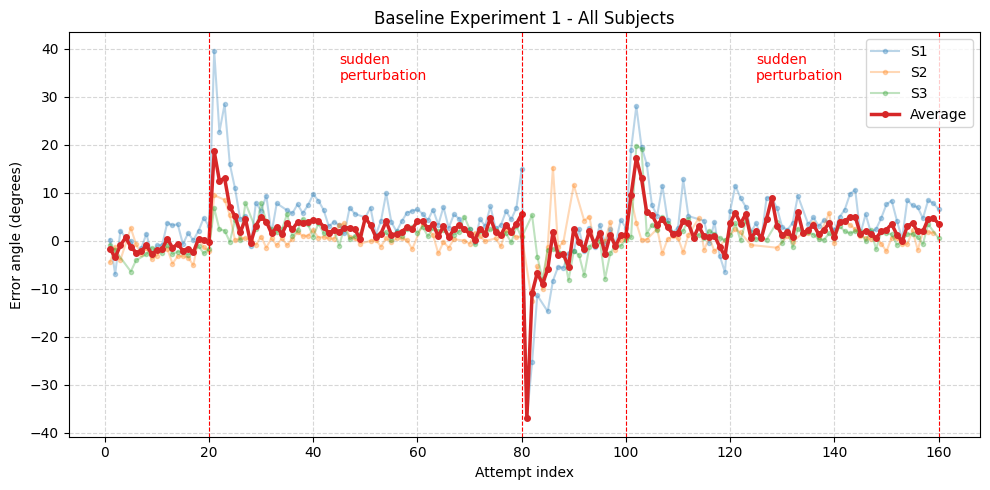

=== Baseline (30min later) ===
S1 Motor Variability (STD): 7.0393 degrees
S2 Motor Variability (STD): 6.8352 degrees
S3 Motor Variability (STD): 5.1687 degrees
Saved plot to `./output\all_subjects_baseline_2.pdf`


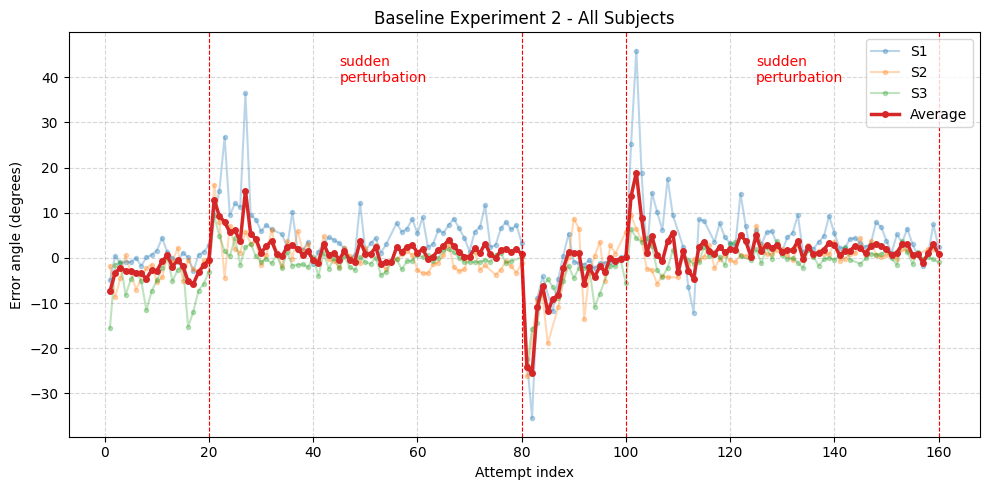

In [9]:
subject_data = []
for sid in SUBJECT_IDS:
    file_name = f'S{sid}_baseline_1_error_angles_TargetAngle_-45.csv'
    attempts, errors = read_error_list(file_name=file_name, subject_id=sid)
    
    # Compute variability for this subject
    unperturbed = errors[:Interval_baseline_1[0]] + errors[Interval_baseline_1[1]:Interval_baseline_2[0]] + errors[Interval_baseline_2[1]:]
    std = compute_variability(unperturbed)
    print(f"S{sid} Motor Variability (STD): {std:.4f} degrees")
    
    subject_data.append((attempts, errors, f'S{sid}'))

plot_errors_multi_subject(subject_data, 
                          title='Baseline Experiment 1 - All Subjects',
                          exp_setup='baseline', 
                          file_name='all_subjects_baseline_1.pdf')

print ("=== Baseline (30min later) ===")
subject_data = []
for sid in SUBJECT_IDS:
    file_name = f'S{sid}_baseline_2_error_angles_TargetAngle_-45.csv'
    attempts, errors = read_error_list(file_name=file_name, subject_id=sid)
    
    # Compute variability for this subject
    unperturbed = errors[:Interval_baseline_1[0]] + errors[Interval_baseline_1[1]:Interval_baseline_2[0]] + errors[Interval_baseline_2[1]:]
    std = compute_variability(unperturbed)
    print(f"S{sid} Motor Variability (STD): {std:.4f} degrees")
    
    subject_data.append((attempts, errors, f'S{sid}'))

plot_errors_multi_subject(subject_data, 
                          title='Baseline Experiment 2 - All Subjects',
                          exp_setup='baseline', 
                          file_name='all_subjects_baseline_2.pdf')

=== Interference (1st)===
S1 Motor Variability (STD): 7.2644 degrees
S2 Motor Variability (STD): 5.9342 degrees
S3 Motor Variability (STD): 4.9911 degrees
Saved plot to `./output\all_subjects_interference_1.pdf`


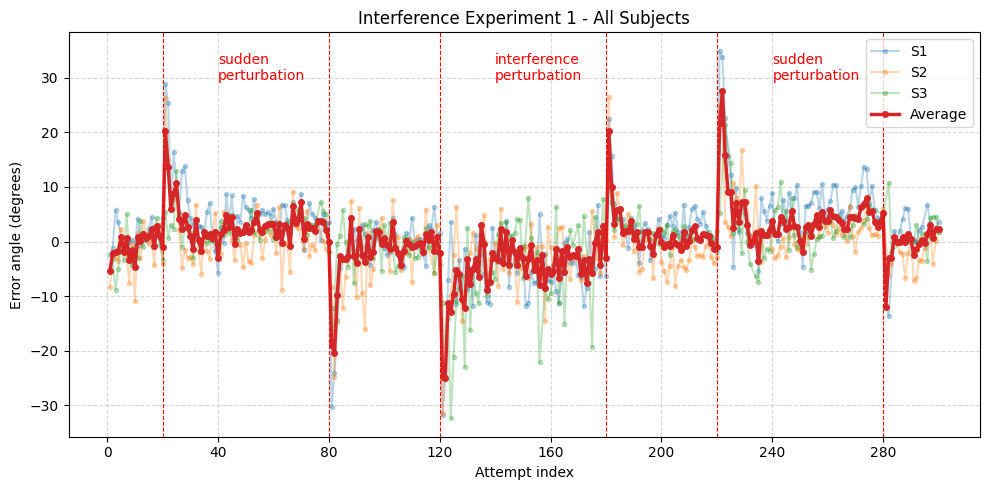

=== Interference (2nd)===
S1 Motor Variability (STD): 7.1178 degrees
S2 Motor Variability (STD): 7.6174 degrees
S3 Motor Variability (STD): 4.9709 degrees
Saved plot to `./output\all_subjects_interference_2.pdf`


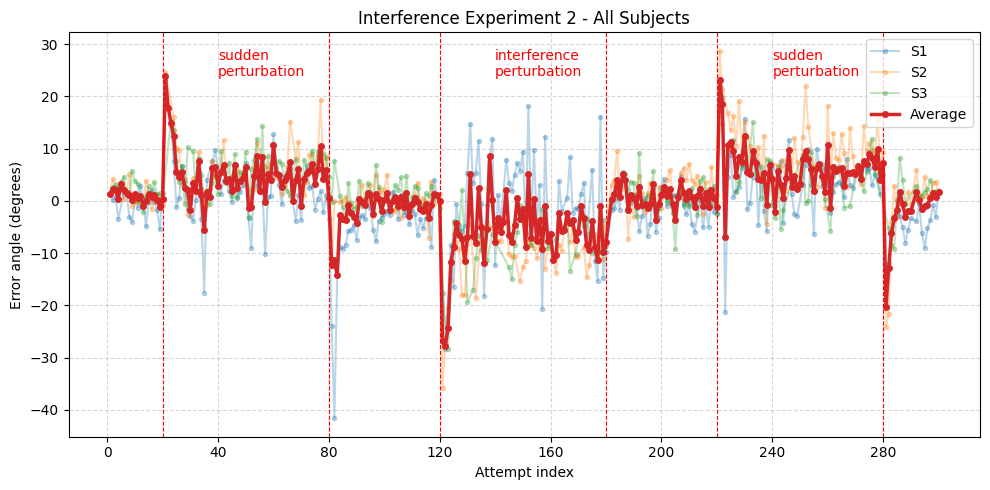

In [10]:
print ("=== Interference (1st)===")
subject_data = []
for sid in SUBJECT_IDS:
    file_name = f'S{sid}_interference_1_error_angles_TargetAngle_135.csv'
    attempts, errors = read_error_list(file_name=file_name, subject_id=sid)
    
    # Compute variability for this subject
    unperturbed = errors[:Interval_baseline_1[0]] + errors[Interval_baseline_1[1]:Interval_baseline_2[0]] + errors[Interval_baseline_2[1]:]
    std = compute_variability(unperturbed)
    print(f"S{sid} Motor Variability (STD): {std:.4f} degrees")
    
    subject_data.append((attempts, errors, f'S{sid}'))

# Plot multi-subject comparison with average
plot_errors_multi_subject(subject_data, 
                          title='Interference Experiment 1 - All Subjects',
                          exp_setup='interference', 
                          file_name='all_subjects_interference_1.pdf')

print ("=== Interference (2nd)===")
subject_data = []
for sid in SUBJECT_IDS:
    file_name = f'S{sid}_interference_2_error_angles_TargetAngle_220.csv'
    attempts, errors = read_error_list(file_name=file_name, subject_id=sid)
    
    # Compute variability for this subject
    unperturbed = errors[:Interval_baseline_1[0]] + errors[Interval_baseline_1[1]:Interval_baseline_2[0]] + errors[Interval_baseline_2[1]:]
    std = compute_variability(unperturbed)
    print(f"S{sid} Motor Variability (STD): {std:.4f} degrees")
    
    subject_data.append((attempts, errors, f'S{sid}'))

# Plot multi-subject comparison with average
plot_errors_multi_subject(subject_data, 
                          title='Interference Experiment 2 - All Subjects',
                          exp_setup='interference', 
                          file_name='all_subjects_interference_2.pdf')

## Task 3

- *Is there any motor adaptation left after 30 minutes?*

Yes, motor adaptation was still present after 30 minutes. In addition, when the perturbation was reintroduced, the initial errors were smaller and adaptation occurred more rapidly, demonstrating a savings effect. Together, these observations suggest that the adaption of the motor command is still retained after 30 mins.

- *What was the effect of interference on your subject’s motor adaptation?*

Interference negatively affected motor adaptation by increasing error amplitude and motor variability, particularly when the interference was applied the same target. This indicates competition between overlapping motor memories. When interference involved a different target, its effect was reduced but motor variability still increased compared to pre-interference, which is caused by smaller overlapping between motor memories.

## Task 4

In Task 4, we increased the angular gap between the target used during initial adaptation and the target used during interference. This was done to explore whether interference strength is related to motor generalization.

=== Interference (increase the gap between target angles)===
S1 Motor Variability (STD): 6.2503 degrees
S2 Motor Variability (STD): 7.3717 degrees
S3 Motor Variability (STD): 4.9709 degrees
Saved plot to `./output\all_subjects_interference_2.pdf`


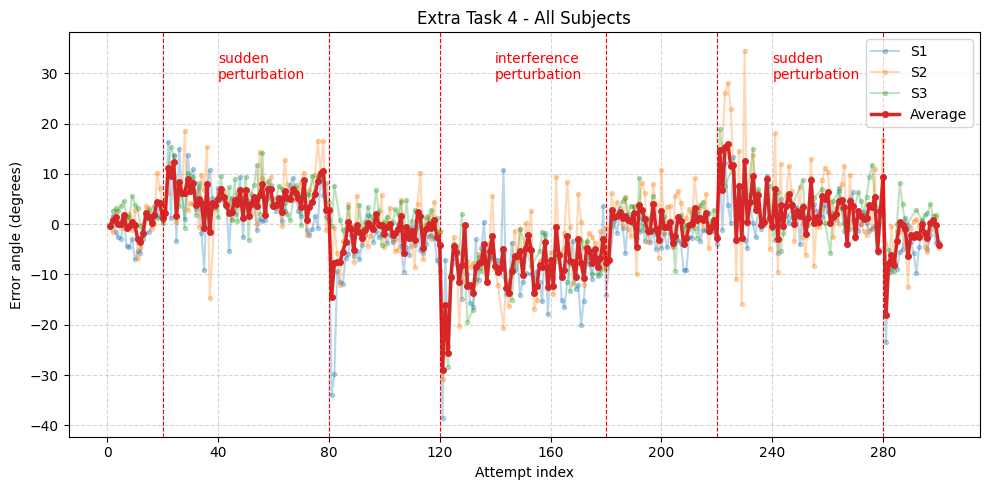

In [8]:
print ("=== Interference (increase the gap between target angles)===")
subject_data = []
for sid in SUBJECT_IDS:
    file_name = f'S{sid}_interference_2_error_angles_TargetAngle_220_InterfAngle_320.csv'
    attempts, errors = read_error_list(file_name=file_name, subject_id=sid)
    
    # Compute variability for this subject
    unperturbed = errors[:Interval_baseline_1[0]] + errors[Interval_baseline_1[1]:Interval_baseline_2[0]] + errors[Interval_baseline_2[1]:]
    std = compute_variability(unperturbed)
    print(f"S{sid} Motor Variability (STD): {std:.4f} degrees")
    
    subject_data.append((attempts, errors, f'S{sid}'))

# Plot multi-subject comparison with average
plot_errors_multi_subject(subject_data, 
                          title='Extra Task 4 - All Subjects',
                          exp_setup='interference', 
                          file_name='all_subjects_interference_2.pdf')

We observed that, with increasing angular distance, subjects adapted more quickly and error angles converged faster toward zero, suggesting adaptation. However, since the same subjects performed all experiments, improved performance may also reflect increased familiarity and internal model refinement. Moreover, these findings should be interpreted cautiously due to the limited number of subjects.